#### [Data set here :](https://drive.google.com/file/d/1qC67z6lhIs3MiPSDJSjw_tuG5BOjv5At/view?usp=sharing)

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('car_evaluation.csv')
pd.options.display.max_columns= None
df.head(20)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [12]:
for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")   

Unique values in column 'vhigh': ['vhigh' 'high' 'med' 'low']
Unique values in column 'vhigh.1': ['vhigh' 'high' 'med' 'low']
Unique values in column '2': ['2' '3' '4' '5more']
Unique values in column '2.1': ['2' '4' 'more']
Unique values in column 'small': ['small' 'med' 'big']
Unique values in column 'low': ['med' 'high' 'low']
Unique values in column 'unacc': ['unacc' 'acc' 'vgood' 'good']


In [13]:
label_encoder = LabelEncoder()
df['vhigh'] = label_encoder.fit_transform(df['vhigh'])
df['vhigh.1'] = label_encoder.fit_transform(df['vhigh.1'] )
df['2'] = label_encoder.fit_transform(df['2'])
df['2.1'] = label_encoder.fit_transform(df['2.1'])
df['small'] = label_encoder.fit_transform(df['small'])
df['low'] = label_encoder.fit_transform(df['low'])
df['unacc'] = label_encoder.fit_transform(df['unacc'])

In [14]:
for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")   

Unique values in column 'vhigh': [3 0 2 1]
Unique values in column 'vhigh.1': [3 0 2 1]
Unique values in column '2': [0 1 2 3]
Unique values in column '2.1': [0 1 2]
Unique values in column 'small': [2 1 0]
Unique values in column 'low': [2 0 1]
Unique values in column 'unacc': [2 0 3 1]


In [15]:
X = df.drop(columns ='unacc')
y = df['unacc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [22]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_f1_score = f1_score(y_train, y_train_pred, average='macro')
test_f1_score = f1_score(y_test, y_test_pred,  average='macro')
train_precision_score = precision_score(y_train, y_train_pred, average='macro')
test_precision_score = precision_score(y_test, y_test_pred,  average='macro')
train_recall_score = recall_score(y_train, y_train_pred, average='macro')
test_recall_score = recall_score(y_test, y_test_pred,  average='macro')


In [25]:
print("Decision Tree Regression Model Evaluation:")
print("------------------------------------------")
print(f"train_accuracy:{train_accuracy *100:.2f} %")
print(f"test_accuracy:{test_accuracy *100:.2f}%")
print("------------------------------------------")
print(f"train_precision_score:{train_precision_score*100:.2f}%")
print(f"test_precision_score:{test_precision_score*100:.2f}%")
print("------------------------------------------")
print(f"train_recall_score:{train_recall_score*100:.2f}%")
print(f"test_recall_score:{test_recall_score*100:.2f}%")
print("------------------------------------------")
print(f"train_f1_score:{train_f1_score*100:.2f}%")
print(f"test_f1_score:{test_f1_score*100:.2f}%")

Decision Tree Regression Model Evaluation:
------------------------------------------
train_accuracy:100.00 %
test_accuracy:97.11%
------------------------------------------
train_precision_score:100.00%
test_precision_score:88.60%
------------------------------------------
train_recall_score:100.00%
test_recall_score:90.65%
------------------------------------------
train_f1_score:100.00%
test_f1_score:89.59%


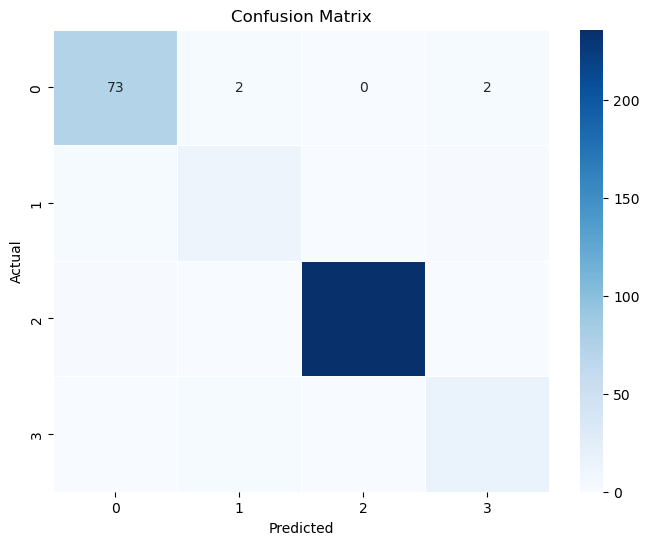

In [26]:
confusion_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap( confusion_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [38]:
report = classification_report(y_test, y_test_pred)

In [39]:
print(report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        77
           1       0.75      0.80      0.77        15
           2       1.00      1.00      1.00       237
           3       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.89      0.91      0.90       346
weighted avg       0.97      0.97      0.97       346

